1.Portion of people who have diabetes disease: In accordance with the Survey, the portions of people who have diabetes is as follows. This space is left for pie chart of who has diabetes, and who doesn’t.

2.Age group of survey Respondent: We explore the age group of survey respondent and find the age group and sex as follows. This space is left for layered to stack histogram of respondent’s age profile.

3.Body Mass Index: Body Mass Index is calculated values, which comes from: BM I = W eight(kg.) Height(m.)2 (1) We explore the data and found the distribution of respondent’s BMI as follows. This space is left for layered to stack histogram of respondent’s

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_binary = pd.read_csv('diabetes_binary_BRFSS2023.csv')


In [4]:
df_binary.head()

,Diabetes_binary,BMI,Obesity_Indicator,Hypertension,High_Cholesterol,Cholesterol_Checked,Chronic_Kidney_Disease,Smoker_100_Cigarettes,Heavy_Alcohol_Consumption,Stroke,...,Physical_Unhealthy_Days,Mental_Unhealthy_Days,Difficulty_Walking,Health_Care_Coverage,Doctor_Visit_Cost_Issue,Last_Checkup,Gender,Age_Group,Education_Level,Income_Level
0,0.0,22.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,6.0,2.0,1.0,1.0,1.0,1.0,0.0,13.0,4.0,2.0
1,1.0,26.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,12.0,5.0,7.0
2,0.0,30.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,1.0,0.0,1.0,0.0,9.0,5.0,7.0
3,0.0,33.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,5.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,5.0,6.0
4,1.0,23.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,12.0,4.0,7.0


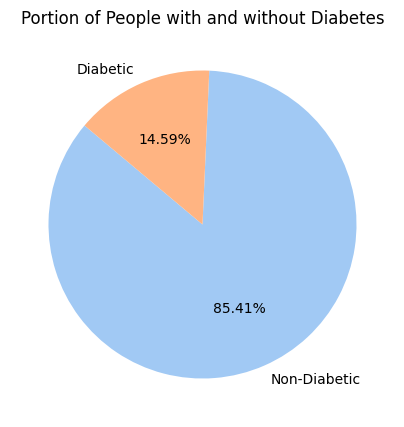

In [5]:
# Assuming `df_binary` is your DataFrame and `Diabetes_binary` contains 0.0 and 1.0 for non-diabetic and diabetic
values = df_binary['Diabetes_binary'].value_counts()
labels = ['Non-Diabetic', 'Diabetic']

# Use a Seaborn color palette
colors = sns.color_palette('pastel', n_colors=2)  # Use pastel colors

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    x=values, 
    labels=labels, 
    autopct='%.2f%%', 
    startangle=140, 
    colors=colors
)
plt.title('Portion of People with and without Diabetes')
plt.savefig('1.Portion of People with and without Diabetes.png', format='png', dpi=300)  # Save as PNG with 300 DPI
plt.show()

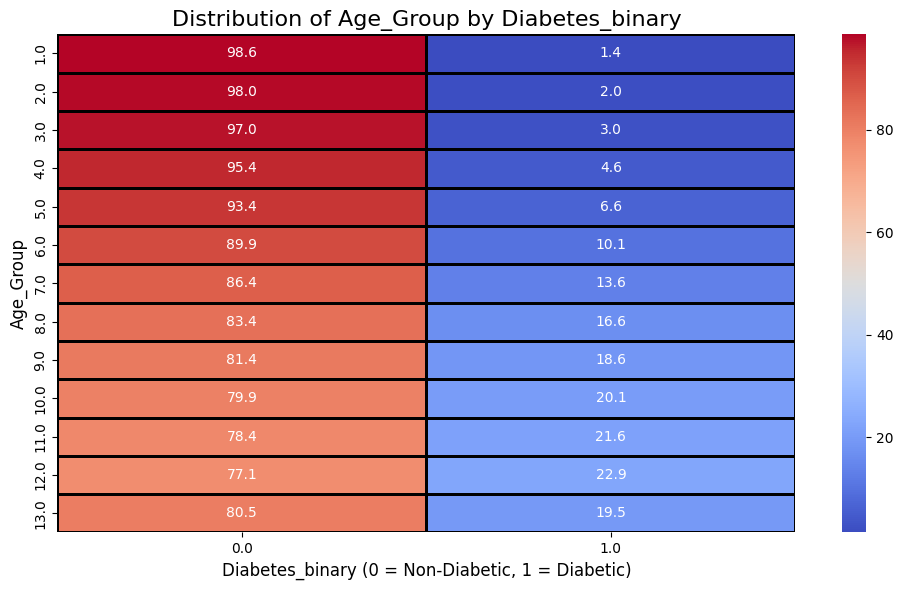

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_age_distribution(feature_name, df):
    """
    Visualizes the relationship between an age group feature and Diabetes_binary using Seaborn with enhanced clarity.
    
    Parameters:
        feature_name (str): The name of the feature (e.g., 'Age_Group') to analyze.
        df (pd.DataFrame): The DataFrame containing the data.
    """

    # Create a crosstab of Age Group vs Diabetes_binary
    cross_tab = pd.crosstab(df[feature_name], df['Diabetes_binary'], normalize='index') * 100  # Convert to percentages
    
    # Set up the heatmap
    fig, ax = plt.subplots(figsize=(10, 6))  # Larger figure for better readability
    sns.heatmap(
        cross_tab,
        annot=True,          # Show values in cells
        cmap="coolwarm",     # Use a clear diverging colormap
        fmt='.1f',           # Format values as percentages
        linewidths=1,        # Add gridlines between cells
        linecolor='black',   # Set gridline color
        cbar=True,           # Show the color bar
        ax=ax
    )

    # Customize titles and labels
    ax.set_title(f'Distribution of {feature_name} by Diabetes_binary', fontsize=16)
    ax.set_xlabel('Diabetes_binary (0 = Non-Diabetic, 1 = Diabetic)', fontsize=12)
    ax.set_ylabel(feature_name, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust tick label size

    # Save and show the plot
    plt.tight_layout()
    plt.savefig('2.Age_Group_Distribution_Heatmap.png', format='png', dpi=300)
    plt.show()

# Example Usage
# Assuming `df_binary` is your DataFrame and 'Age_Group' is the feature of interest
visualize_age_distribution('Age_Group', df_binary)

In [7]:
import numpy as np

# Generate bins dynamically based on the range of BMI values in df_binary
min_bmi = df_binary['BMI'].min()
max_bmi = df_binary['BMI'].max()

# Define the number of bins or step size (you can adjust the step size as needed)
step_size = 5  # Each bin spans 5 BMI units
bins = np.arange(min_bmi, max_bmi + step_size, step_size)

# Create labels dynamically based on the bins
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

# Print the generated bins and labels
print("Bins:", bins)
print("Labels:", labels)

Bins: [ 12.  17.  22.  27.  32.  37.  42.  47.  52.  57.  62.  67.  72.  77.
  82.  87.  92.  97. 102.]
Labels: ['12-17', '17-22', '22-27', '27-32', '32-37', '37-42', '42-47', '47-52', '52-57', '57-62', '62-67', '67-72', '72-77', '77-82', '82-87', '87-92', '92-97', '97-102']


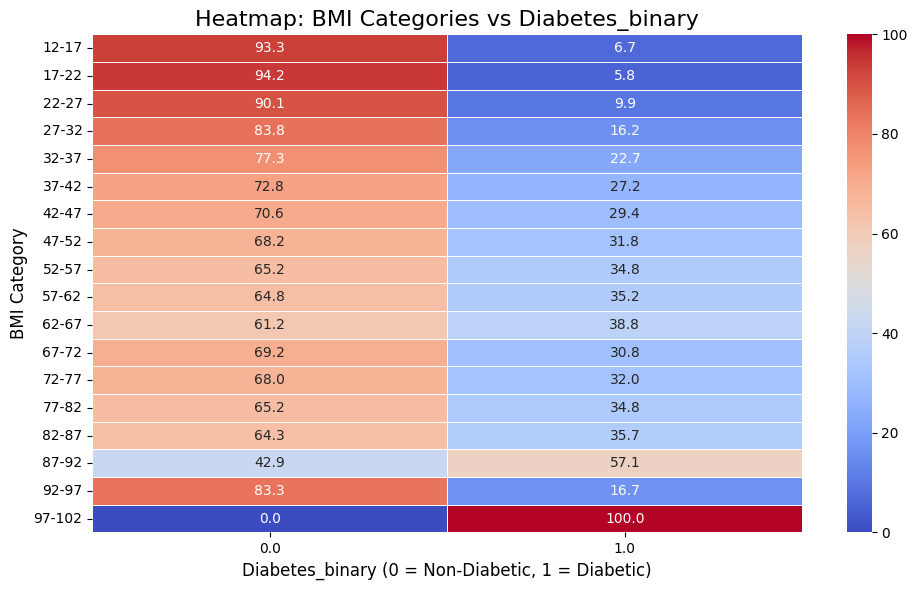

In [8]:
def heatmap_bmi_dynamic(df):
    """
    Generates a heatmap showing the distribution of dynamically binned BMI categories across Diabetes_binary.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing 'BMI' and 'Diabetes_binary'.
    """
    # Generate dynamic bins and labels
    min_bmi = df['BMI'].min()
    max_bmi = df['BMI'].max()
    step_size = 5
    bins = np.arange(min_bmi, max_bmi + step_size, step_size)
    labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

    # Create BMI categories dynamically
    df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, include_lowest=True)

    # Create a crosstab for BMI categories and Diabetes_binary
    crosstab_bmi = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'], normalize='index') * 100

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab_bmi, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, cbar=True)
    plt.title('Heatmap: BMI Categories vs Diabetes_binary', fontsize=16)
    plt.xlabel('Diabetes_binary (0 = Non-Diabetic, 1 = Diabetic)', fontsize=12)
    plt.ylabel('BMI Category', fontsize=12)
    plt.tight_layout()

    # Save the heatmap as an image
    plt.savefig('3.BMI_vs_Diabetes_Heatmap.png', format='png', dpi=300)

    plt.show()

# Example usage
heatmap_bmi_dynamic(df_binary)

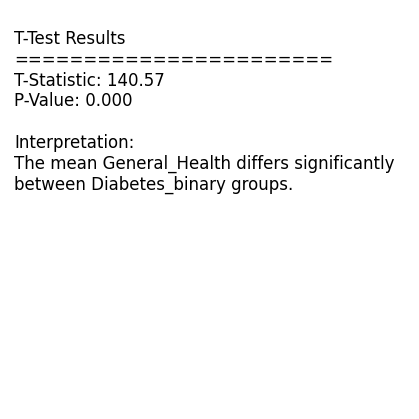

In [9]:

from scipy.stats import ttest_ind

# Data preparation (replace this with your actual DataFrame)
# Assuming 'df_binary' contains 'Diabetes_binary' and 'General_Health' columns
# df_binary = ...

# Divide groups
diabetes_group = df_binary[df_binary['Diabetes_binary'] == 1]['General_Health']
no_diabetes_group = df_binary[df_binary['Diabetes_binary'] == 0]['General_Health']

# Perform T-Test
t_stat, p_val = ttest_ind(diabetes_group, no_diabetes_group)

# Format Results
result_text = (
    f"T-Test Results\n"
    f"=======================\n"
    f"T-Statistic: {t_stat:.2f}\n"
    f"P-Value: {p_val:.3f}\n"
    f"\nInterpretation:\n"
    f"The mean General_Health differs significantly between Diabetes_binary groups."
    if p_val < 0.05 else
    f"No significant difference in General_Health between Diabetes_binary groups."
)

# Save Results as an Image
plt.figure(figsize=(4, 4))  # Adjust figure size
plt.text(0.01, 0.95, result_text, fontsize=12, ha="left", va="top", wrap=True)  # Adjust text position
plt.axis("off")  # Hide axes
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)  # Remove padding
plt.savefig("4.General Health_t_test_results.png", bbox_inches="tight", dpi=300)  # Save with tight layout
plt.show()

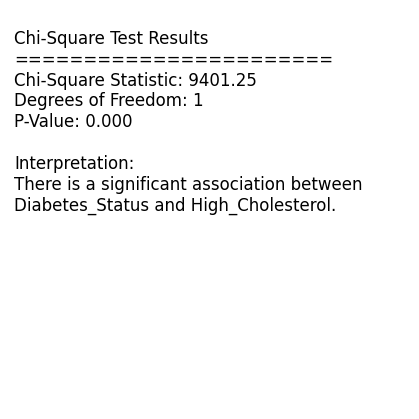

In [10]:

from scipy.stats import chi2_contingency


# Contingency table
contingency_table = pd.crosstab(df_binary['Diabetes_binary'], df_binary['High_Cholesterol'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpret Results
result_text = (
    f"Chi-Square Test Results\n"
    f"=======================\n"
    f"Chi-Square Statistic: {chi2:.2f}\n"
    f"Degrees of Freedom: {dof}\n"
    f"P-Value: {p:.3f}\n"
    f"\nInterpretation:\n"
    f"There is a significant association between Diabetes_Status and High_Cholesterol."
    if p < 0.05 else
    f"No significant association between Diabetes_Status and High_Cholesterol."
)

# Save Results as an Image
plt.figure(figsize=(4, 4))  # Reduce height of the figure
plt.text(0.01, 0.95, result_text, fontsize=12, ha="left", va="top", wrap=True)  # Adjust text position
plt.axis("off")
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)  # Remove extra padding
plt.savefig("4.Hight_Cholesteral_chi_square_results_tight.png", bbox_inches="tight", dpi=300)  # Save with tight layout
plt.show()

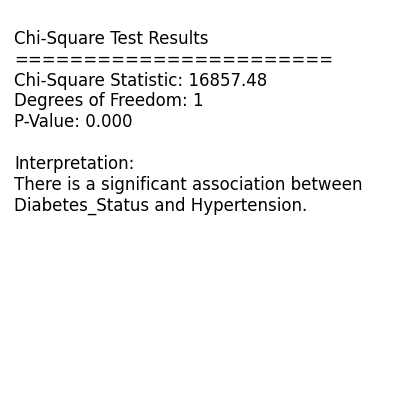

In [11]:
# Contingency table for Hypertension
contingency_table = pd.crosstab(df_binary['Diabetes_binary'], df_binary['Hypertension'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpret Results
result_text = (
    f"Chi-Square Test Results\n"
    f"=======================\n"
    f"Chi-Square Statistic: {chi2:.2f}\n"
    f"Degrees of Freedom: {dof}\n"
    f"P-Value: {p:.3f}\n"
    f"\nInterpretation:\n"
    f"There is a significant association between Diabetes_Status and Hypertension."
    if p < 0.05 else
    f"No significant association between Diabetes_Status and Hypertension."
)

# Save Results as an Image
plt.figure(figsize=(4, 4))  # Adjust figure size
plt.text(0.01, 0.95, result_text, fontsize=12, ha="left", va="top", wrap=True)  # Adjust text position
plt.axis("off")  # Hide axes
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)  # Remove extra padding
plt.savefig("4.Hypertension_chi_square_results_tight.png", bbox_inches="tight", dpi=300)  # Save with tight layout
plt.show()

In [12]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df_binary['Diabetes_binary'], df_binary['Hypertension'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
Chi-Square Statistic        & {chi2:.2f}       \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                     & {p:.3f}         \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{Chi-Square Test Results: Association between Diabetes Status and Hypertension}}
\label{{tab:chi_square_results}}
\end{{table}}
"""

# Save to a .tex file
with open("4.Hypertension_chi_square_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '4.Hypertension_chi_square_table.tex'")

LaTeX code with real results written to '4.Hypertension_chi_square_table.tex'


In [13]:
from scipy.stats import chi2_contingency
import pandas as pd

# Example contingency table for Age_Group
# Replace 'Age_Group' with the actual column name in your dataset
contingency_table = pd.crosstab(df_binary['Diabetes_binary'], df_binary['Age_Group'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
Chi-Square Statistic        & {chi2:.2f}       \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                     & {p:.3f}         \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{Chi-Square Test Results: Association between Diabetes Status and Age Group}}
\label{{tab:chi_square_age_group_results}}
\end{{table}}
"""

# Save to a .tex file
with open("5.Age_Group_chi_square_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '5.Age_Group_chi_square_table.tex'")

LaTeX code with real results written to '5.Age_Group_chi_square_table.tex'


In [14]:
from scipy.stats import chi2_contingency
import pandas as pd

# Example contingency table for Difficulty_Walking
# Replace 'Difficulty_Walking' with the actual column name in your dataset
contingency_table = pd.crosstab(df_binary['Diabetes_binary'], df_binary['Difficulty_Walking'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
Chi-Square Statistic        & {chi2:.2f}       \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                     & {p:.3f}         \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{Chi-Square Test Results: Association between Diabetes Status and Difficulty Walking}}
\label{{tab:chi_square_difficulty_walking_results}}
\end{{table}}
"""

# Save to a .tex file
with open("6.Difficulty_Walking_chi_square_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '6.Difficulty_Walking_chi_square_table.tex'")

LaTeX code with real results written to '6.Difficulty_Walking_chi_square_table.tex'


In [16]:


# Divide groups
diabetes_group = df_binary[df_binary['Diabetes_binary'] == 1]['General_Health']
no_diabetes_group = df_binary[df_binary['Diabetes_binary'] == 0]['General_Health']

# Perform T-Test
t_stat, p_val = ttest_ind(diabetes_group, no_diabetes_group)

# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
T-Statistic                & {t_stat:.2f}     \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                    & {p_val:.3f}      \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{T-Test Results: General Health Comparison between Diabetes and Non-Diabetes Groups}}
\label{{tab:t_test_general_health_results}}
\end{{table}}
"""

# Save to a .tex file
with open("7.General_Health_t_test_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '7.General_Health_t_test_table.tex'")

LaTeX code with real results written to '7.General_Health_t_test_table.tex'


In [17]:
# Divide groups
diabetes_group = df_binary[df_binary['Diabetes_binary'] == 1]['BMI']
no_diabetes_group = df_binary[df_binary['Diabetes_binary'] == 0]['BMI']

# Perform T-Test
t_stat, p_val = ttest_ind(diabetes_group, no_diabetes_group)

# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
T-Statistic                & {t_stat:.2f}     \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                    & {p_val:.3f}      \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{T-Test Results: BMI Comparison between Diabetes and Non-Diabetes Groups}}
\label{{tab:t_test_bmi_results}}
\end{{table}}
"""

# Save to a .tex file
with open("8.BMI_t_test_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '8.BMI_t_test_table.tex'")

LaTeX code with real results written to '8.BMI_t_test_table.tex'
